<a href="https://colab.research.google.com/github/beatrizmbrm/IrisData-ML/blob/main/IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from scipy.stats import wilcoxon


In [110]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DatasetIrisData'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DatasetIrisData


In [111]:
print(df.head())


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [112]:
df = df.dropna()

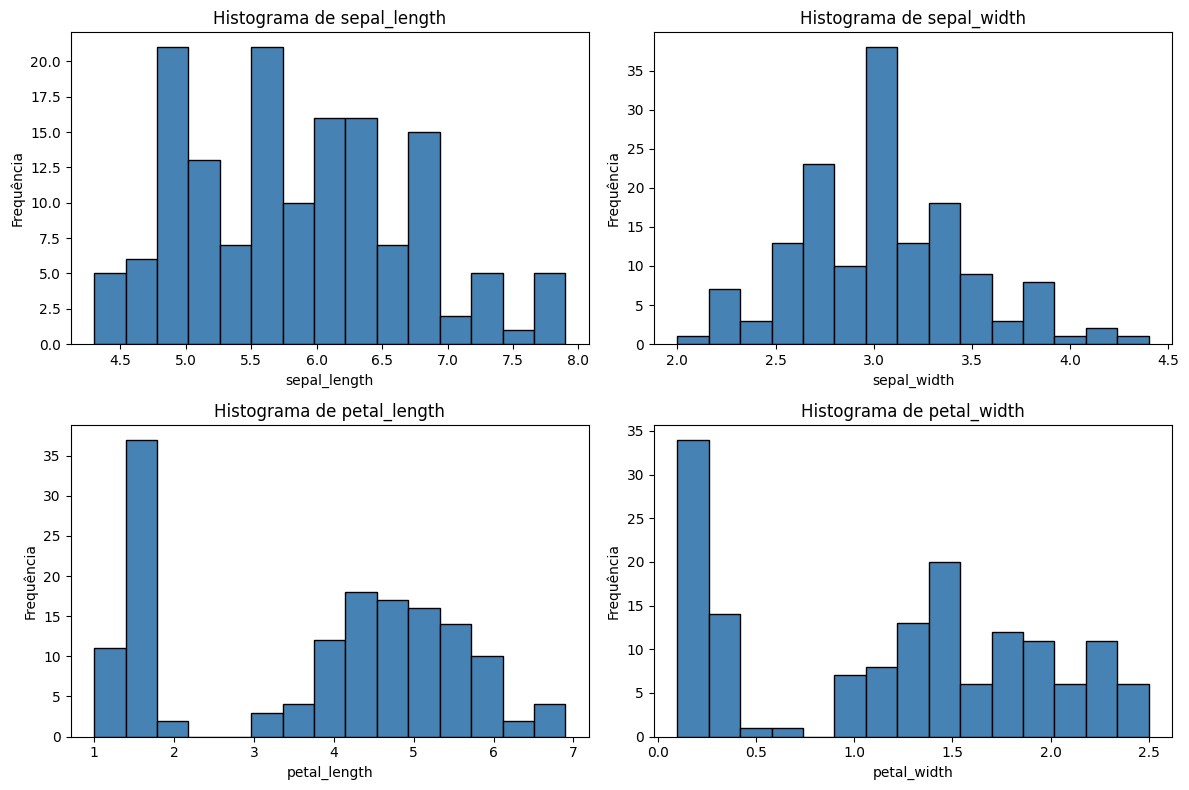

In [115]:
# Leitura dos dados
df = pd.read_csv('iris.data', header=None)

# Atribuindo nomes às colunas
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Lista de colunas numéricas
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Criação dos histogramas
plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=15, color='steelblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

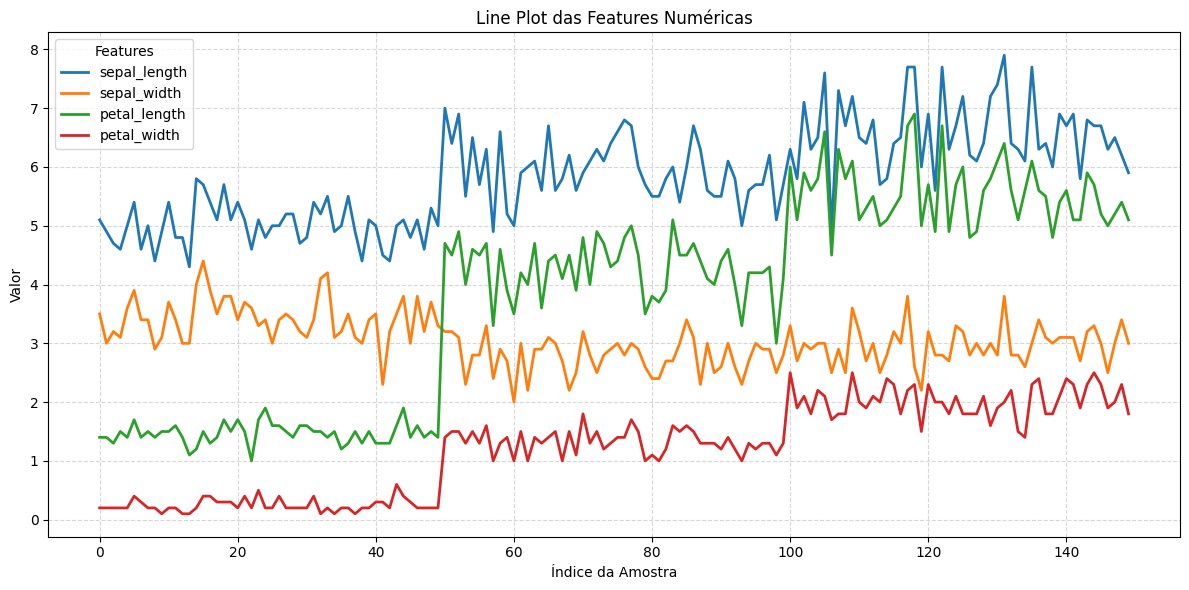

In [116]:
# Seleciona as colunas numéricas
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
for feature in features:
    plt.plot(df.index, df[feature], label=feature, linewidth=2)

plt.title('Line Plot das Features Numéricas')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Features')
plt.tight_layout()
plt.show()


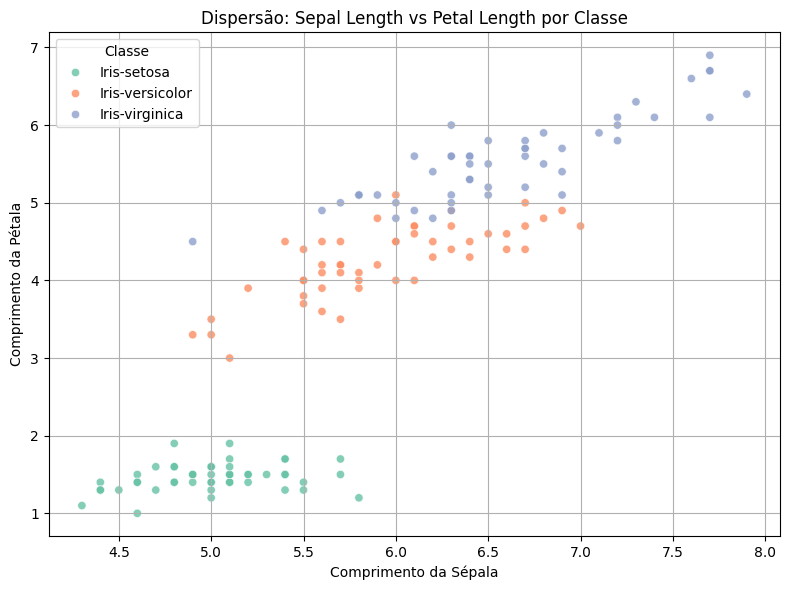

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='class', palette='Set2', alpha=0.8)
plt.title('Dispersão: Sepal Length vs Petal Length por Classe')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Comprimento da Pétala')
plt.legend(title='Classe')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-118-2859400222.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in features], labels=features, patch_artist=True,


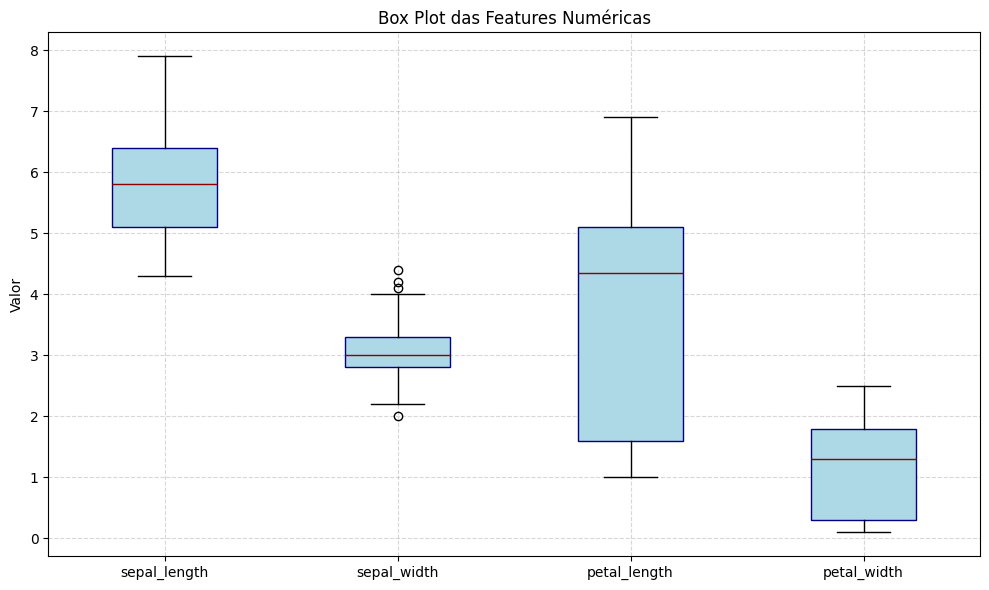

In [118]:
# Seleciona as colunas numéricas
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Cria o box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[col] for col in features], labels=features, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='navy'),
            medianprops=dict(color='darkred'))

plt.title('Box Plot das Features Numéricas')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


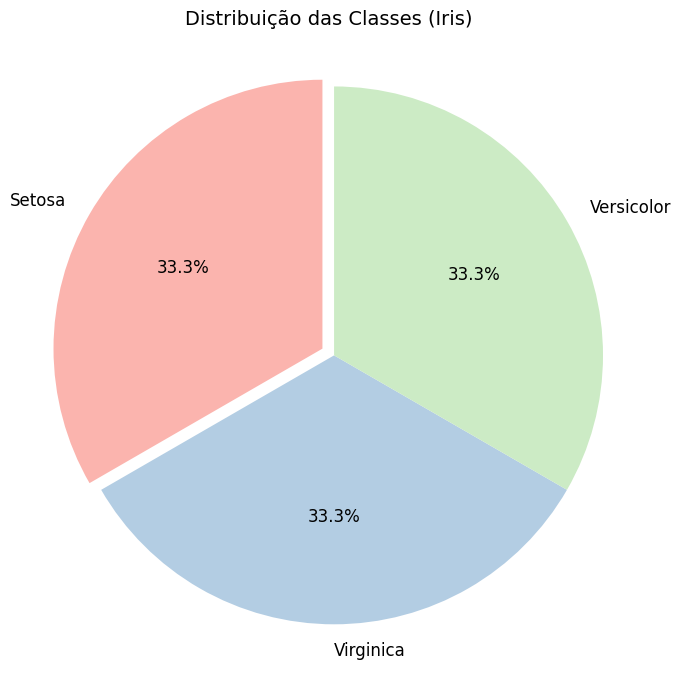

In [120]:
# Conta a frequência de cada classe
contagem_classes = df['class'].value_counts()

# Nomes legíveis (ajuste conforme sua codificação)
labels = ['Setosa', 'Virginica', 'Versicolor']

# Explode (opcional): destaca a fatia da classe mais frequente
explode = [0.05 if i == contagem_classes.idxmax() else 0 for i in contagem_classes.index]


# Criação do gráfico de pizza simples e elegante
plt.figure(figsize=(7, 7))
plt.pie(contagem_classes, labels=labels, autopct='%1.1f%%',
        startangle=90, explode=explode, colors=colors,
        textprops={'fontsize': 12})

plt.title('Distribuição das Classes (Iris)', fontsize=14)
plt.axis('equal')  # Mantém o formato circular
plt.tight_layout()
plt.show()


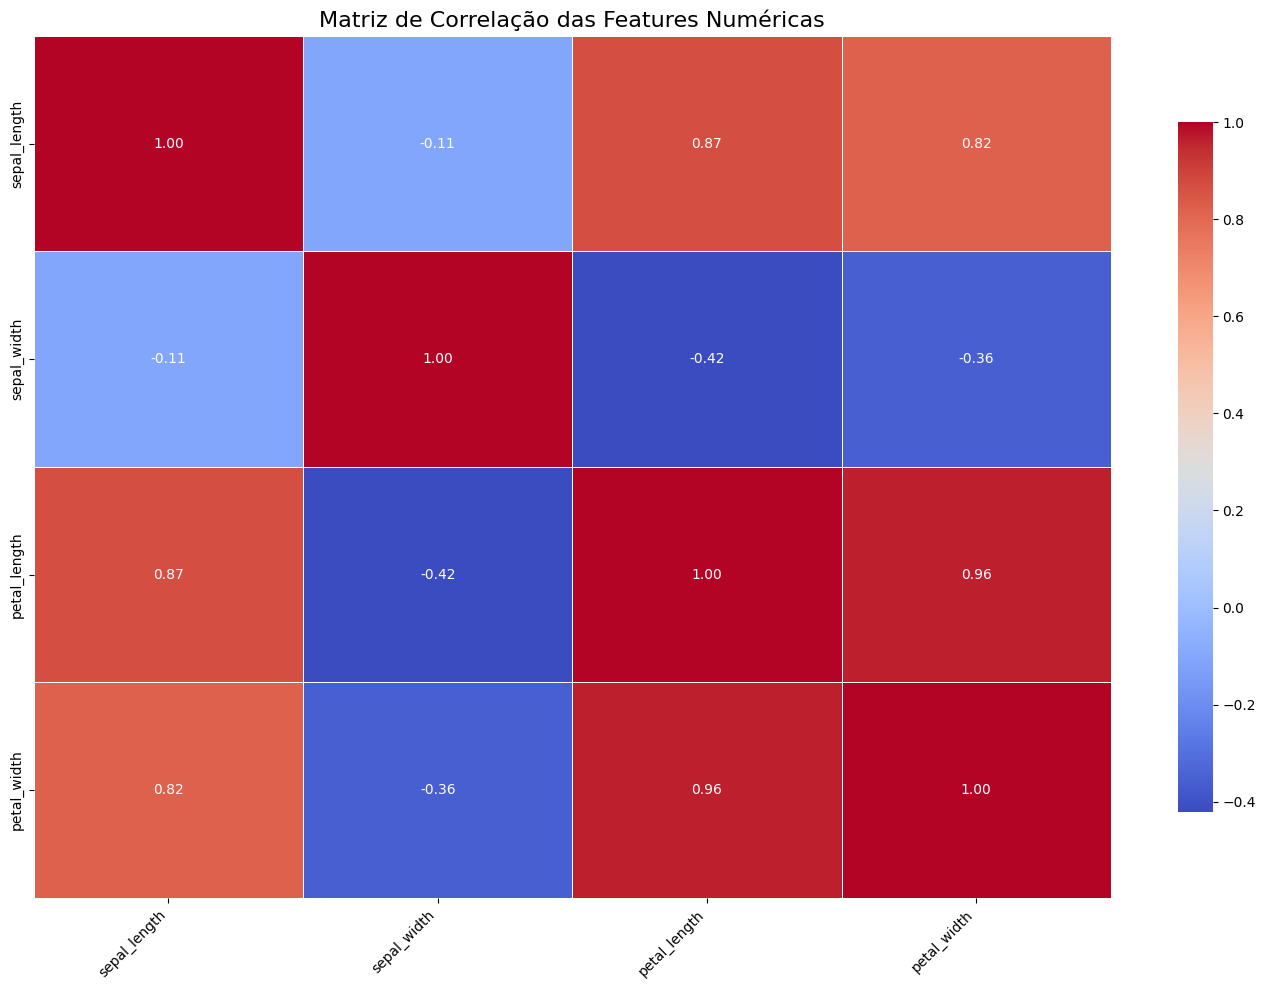

In [121]:
# Calcula a correlação entre as colunas numéricas
corr = df.select_dtypes(include='number').corr()

# Configura e exibe o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlação das Features Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [122]:
# Criar uma máscara para as correlações acima do limite
limite_corr = 0.9
correlacoes_acima_do_limite = corr.abs() > limite_corr

# Encontrar os pares de variáveis altamente correlacionadas
pares_correlacionados = np.where(np.triu(correlacoes_acima_do_limite, k=1))
pares_correlacionados_list = [(corr.index[i], corr.columns[j]) for i, j in zip(*pares_correlacionados)]

# Identificar colunas a serem excluídas (mantendo uma coluna por par)
colunas_para_excluir = set()
for par in pares_correlacionados_list:
    colunas_para_excluir.add(par[1])  # Pode ajustar a lógica para escolher a coluna a manter

# Excluir colunas do DataFrame
df_reduzido = df.drop(columns=colunas_para_excluir)

print("Colunas excluídas:", colunas_para_excluir)
print("DataFrame resultante:")
print(df_reduzido)

Colunas excluídas: {'petal_width'}
DataFrame resultante:
     sepal_length  sepal_width  petal_length           class
0             5.1          3.5           1.4     Iris-setosa
1             4.9          3.0           1.4     Iris-setosa
2             4.7          3.2           1.3     Iris-setosa
3             4.6          3.1           1.5     Iris-setosa
4             5.0          3.6           1.4     Iris-setosa
..            ...          ...           ...             ...
145           6.7          3.0           5.2  Iris-virginica
146           6.3          2.5           5.0  Iris-virginica
147           6.5          3.0           5.2  Iris-virginica
148           6.2          3.4           5.4  Iris-virginica
149           5.9          3.0           5.1  Iris-virginica

[150 rows x 4 columns]


In [123]:
num_features_restantes = df_reduzido.drop(columns='class').shape[1]
print(f"Número de features após remoção: {num_features_restantes}")


Número de features após remoção: 3


In [124]:
df = pd.read_csv('iris.data', header=None)

In [126]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


In [127]:
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


In [130]:
df['class']= df['class'].replace('Iris-setosa',0)
df['class']= df['class'].replace('Iris-virginica',1)
df['class']= df['class'].replace('Iris-versicolor',2)

In [131]:
print(df['class'].unique())

[0 2 1]


In [132]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [133]:
X = df.drop('class', axis=1)
y = df['class']


In [134]:

kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [135]:
# Definir os grids dos hiperparâmetros para cada algoritmo

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

print("Grids de hiperparâmetros configuradas com sucesso!")


Grids de hiperparâmetros configuradas com sucesso!


In [136]:
test_scores=[]

In [137]:
accs_val=[]
par=[]

In [138]:
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

    # Dividir treino em treino + validação
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Listas KNN
    accs_val_knn, precisions_val_knn, recalls_val_knn, f1s_val_knn, par_knn = [], [], [], [], []

    for params in ParameterGrid(param_grid_knn):
        model = KNeighborsClassifier(**params)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        accs_val_knn.append(accuracy_score(y_val, y_pred))
        precisions_val_knn.append(precision_score(y_val, y_pred, average='weighted'))
        recalls_val_knn.append(recall_score(y_val, y_pred, average='weighted'))
        f1s_val_knn.append(f1_score(y_val, y_pred, average='weighted'))
        par_knn.append(params)

    # Listas Árvore de Decisão
    accs_val_dt, precisions_val_dt, recalls_val_dt, f1s_val_dt, par_dt = [], [], [], [], []

    for params in ParameterGrid(param_grid_dt):
        model = DecisionTreeClassifier(**params)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        accs_val_dt.append(accuracy_score(y_val, y_pred))
        precisions_val_dt.append(precision_score(y_val, y_pred, average='weighted'))
        recalls_val_dt.append(recall_score(y_val, y_pred, average='weighted'))
        f1s_val_dt.append(f1_score(y_val, y_pred, average='weighted'))
        par_dt.append(params)

    # Listas Random Forest
    accs_val_rf, precisions_val_rf, recalls_val_rf, f1s_val_rf, par_rf = [], [], [], [], []

    for params in ParameterGrid(param_grid_rf):
        model = RandomForestClassifier(**params)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        accs_val_rf.append(accuracy_score(y_val, y_pred))
        precisions_val_rf.append(precision_score(y_val, y_pred, average='weighted'))
        recalls_val_rf.append(recall_score(y_val, y_pred, average='weighted'))
        f1s_val_rf.append(f1_score(y_val, y_pred, average='weighted'))
        par_rf.append(params)

    # Encontrar os melhores parâmetros com base no F1
    idx_knn = np.argmax(f1s_val_knn)
    idx_dt = np.argmax(f1s_val_dt)
    idx_rf = np.argmax(f1s_val_rf)

    print(f"\n Fold {fold_idx + 1} Resultados")
    print(f"KNN >>> acc={accs_val_knn[idx_knn]:.4f} | f1={f1s_val_knn[idx_knn]:.4f} | par={par_knn[idx_knn]}")
    print(f"DT  >>> acc={accs_val_dt[idx_dt]:.4f} | f1={f1s_val_dt[idx_dt]:.4f} | par={par_dt[idx_dt]}")
    print(f"RF  >>> acc={accs_val_rf[idx_rf]:.4f} | f1={f1s_val_rf[idx_rf]:.4f} | par={par_rf[idx_rf]}")


 Fold 1 Resultados
KNN >>> acc=0.9583 | f1=0.9588 | par={'metric': 'euclidean', 'n_neighbors': 5}
DT  >>> acc=0.9167 | f1=0.9180 | par={'max_depth': None, 'min_samples_split': 10}
RF  >>> acc=0.9167 | f1=0.9180 | par={'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

 Fold 2 Resultados
KNN >>> acc=1.0000 | f1=1.0000 | par={'metric': 'euclidean', 'n_neighbors': 5}
DT  >>> acc=1.0000 | f1=1.0000 | par={'max_depth': 10, 'min_samples_split': 5}
RF  >>> acc=1.0000 | f1=1.0000 | par={'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

 Fold 3 Resultados
KNN >>> acc=1.0000 | f1=1.0000 | par={'metric': 'euclidean', 'n_neighbors': 3}
DT  >>> acc=1.0000 | f1=1.0000 | par={'max_depth': None, 'min_samples_split': 2}
RF  >>> acc=1.0000 | f1=1.0000 | par={'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

 Fold 4 Resultados
KNN >>> acc=1.0000 | f1=1.0000 | par={'metric': 'euclidean', 'n_neighbors': 3}
DT  >>> acc=0.9583 | f1=0.9587 | par={'max_depth': None, 'm

In [101]:
print("F1 Scores KNN:", f1s_val_knn)
print("F1 Scores Decision Tree:", f1s_val_dt)
print("F1 Scores Random Forest:", f1s_val_rf)

print("Tamanho KNN:", len(f1s_val_knn))
print("Tamanho Decision Tree:", len(f1s_val_dt))
print("Tamanho Random Forest:", len(f1s_val_rf))


F1 Scores KNN: [0.958710407239819, 0.8348214285714285, 0.7455357142857143, 0.6951357466063349, 0.6951357466063349, 0.9174107142857143, 0.9174107142857143, 0.875, 0.8348214285714285, 0.7916666666666666, 0.958710407239819, 0.8348214285714285, 0.7455357142857143, 0.6951357466063349, 0.6951357466063349, 0.9174107142857143, 0.8348214285714285, 0.7916666666666666, 0.6951357466063349, 0.7455357142857143]
F1 Scores Decision Tree: [0.876131221719457, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.876131221719457, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.876131221719457, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.876131221719457, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143, 0.9174107142857143]
F1 Scores Random Forest: [0.9174107142857143, 0.876131221719457, 0.876131221719457, 0.876131221719457, 0.876131221719457, 0.876131221719457, 0.876131221719457, 0.917410714285714

In [102]:
min_tamanho = min(len(f1s_val_knn), len(f1s_val_rf))
f1s_val_knn = f1s_val_knn[:min_tamanho]
f1s_val_dt = f1s_val_dt[:min_tamanho]
f1s_val_rf = f1s_val_rf[:min_tamanho]

print("Tamanho KNN:", len(f1s_val_knn))
print("Tamanho Decision Tree:", len(f1s_val_dt))
print("Tamanho Random Forest:", len(f1s_val_rf))


Tamanho KNN: 18
Tamanho Decision Tree: 18
Tamanho Random Forest: 18


In [103]:
media_f1_knn = np.mean(f1s_val_knn)
media_f1_dt = np.mean(f1s_val_dt)
media_f1_rf = np.mean(f1s_val_rf)

media_acc_knn = np.mean(accs_val_knn)
media_acc_dt = np.mean(accs_val_dt)
media_acc_rf = np.mean(accs_val_rf)

media_recall_knn = np.mean(recalls_val_knn)
media_recall_dt = np.mean(recalls_val_dt)
media_recall_rf = np.mean(recalls_val_rf)

media_precisions_knn = np.mean(precisions_val_knn)
media_precisions_dt = np.mean(precisions_val_dt)
media_precisions_rf = np.mean(precisions_val_rf)

print('Média F1 KNN:', media_f1_knn)
print('Média F1 DT:', media_f1_dt)
print('Média F1 RF:', media_f1_rf)

print('Média Acc KNN:', media_acc_knn)
print('Média Acc DT:', media_acc_dt)
print('Média Acc RF:', media_acc_rf)

print('Média Recall KNN:', media_recall_knn)
print('Média Recall DT:', media_recall_dt)
print('Média Recall RF:', media_recall_rf)

print('Média Precision KNN:', media_precisions_knn)
print('Média Precision DT:', media_precisions_dt)
print('Média Precision RF:', media_precisions_rf)

Média F1 KNN: 0.8188270233306998
Média F1 DT: 0.9082374937154349
Média F1 RF: 0.8853044422897365
Média Acc KNN: 0.8125
Média Acc DT: 0.9083333333333334
Média Acc RF: 0.8842592592592592
Média Recall KNN: 0.8125
Média Recall DT: 0.9083333333333334
Média Recall RF: 0.8842592592592592
Média Precision KNN: 0.848533098845599
Média Precision DT: 0.9263392857142858
Média Precision RF: 0.8940972222222222


In [104]:
# Exemplo: comparando KNN vs. Decision Tree
stat_knn_dt, p_knn_dt = wilcoxon(f1s_val_knn, f1s_val_dt)
print(f"Wilcoxon KNN vs DT: estatística={stat_knn_dt:.4f}, p-valor={p_knn_dt:.4f}")

# Comparando KNN vs. Random Forest
stat_knn_rf, p_knn_rf = wilcoxon(f1s_val_knn, f1s_val_rf)
print(f"Wilcoxon KNN vs RF: estatística={stat_knn_rf:.4f}, p-valor={p_knn_rf:.4f}")

# Comparando Decision Tree vs. Random Forest
stat_dt_rf, p_dt_rf = wilcoxon(f1s_val_dt, f1s_val_rf)
print(f"Wilcoxon DT vs RF: estatística={stat_dt_rf:.4f}, p-valor={p_dt_rf:.4f}")


Wilcoxon KNN vs DT: estatística=12.0000, p-valor=0.0022
Wilcoxon KNN vs RF: estatística=20.0000, p-valor=0.0042
Wilcoxon DT vs RF: estatística=6.5000, p-valor=0.0039
